In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import re

In [40]:
def read_csv(path: str):
    """
    Funcao responsavel por realizar a leitura de um dataset em formato csv

    Parameters:
    path: Arquivo csv contendo os dados

    Returns: 
    df: DataFrame contendo os dados já lidos 
    """
    df = pd.read_csv(path, low_memory=True, dtype=str)
    if "votos_cantidad" in df.columns:
        df["votos_cantidad"] = df["votos_cantidad"].astype("int32")

    return df

In [41]:
coalizoes = [
    "JUNTOS POR EL CAMBIO",
    "UNION POR LA PATRIA", 
    "LA LIBERTAD AVANZA",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "HACEMOS POR NUESTRO PAIS",
    "FRENTE DE TODOS",
    "CONSENSO FEDERAL",
    "TERCERA VIA",
    "CAMBIA MENDOZA",
    "CAMBIEMOS",
    "UNIDAD CIUDADANA",
    "JUSTICIALISMO",
    "1PAIS",
    "PARTIDO SOCIALISTA",
    "FRENTE PARA LA VICTORIA",
    "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "PROGRESISTAS",
    "COMPROMISSO FEDERAL",
    "FRENTE DE RENOVACION",
    "PERONISMO FEDERAL",
    "UNION PRO",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE RENOVADOR",
    "PROPUESTA REPUBLICANA",
    "PARTIDO FE",
    "NUEVA IZQUIERDA",
    ""
]


# Dicionário de normalizações específicas
normalizacoes = {
    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "HACEMOS": "HACEMOS POR NUESTRO PAIS",
    "FRENTE DE IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE TODOS": "FRENTE DE TODOS",
    "ARI": "COALICION CIVICA - AFIRMACION PARA UNA REPUBLICA IGUALITARIA (ARI)",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "FE": "PARTIDO FE",
    "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "CAMBIEMOS": "CAMBIEMOS",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES": "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ALIANZA PROGRESISTA": "PROGRESISTAS",
    "NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA,"
}

def normalize_name(name: str) -> str:
    """Normaliza o nome de partidos/coalizões"""
    if pd.isna(name):
        return name
    
    # Remove acentos
    name = unicodedata.normalize('NFD', name)
    name = ''.join(c for c in name if unicodedata.category(c) != 'Mn')

    # Maiúsculas e strip
    name = name.upper().strip()

    # Normalização específica
    for chave, valor in normalizacoes.items():
        if chave in name:
            return valor

    # Limpeza final de espaços
    name = re.sub(r'\s+', ' ', name)
    return name.strip()

In [42]:
def plot_votos(df: pd.DataFrame, cargo:str):
    """
    Plota um gráfico de barras com os votos agrupados por partido para um determinado cargo.

    Parameters:
    df: DataFrame contendo os dados
    cargo: Cargo a ser utilizado como filtro (string)
    """

    # Filtrando para apenas Presidente
    df_presidente = df[df["cargo_nombre"] == cargo]

    # Agrupando votos para Presidente por Partido
    votos_por_partido = (df_presidente.groupby("agrupacion_nombre")["votos_cantidad"].sum().sort_values(ascending=False))

    # Exibição do gráfico
    plt.figure(figsize=(10,6))
    votos_por_partido.plot(kind="bar")
    plt.title(f"Votos para {cargo} por Partido")
    plt.ylabel("Quantidade de votos")
    plt.xlabel("Partido", fontsize=8)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [43]:
#Leitura do CSV de 2023 contendo os resultados eleitorais provisorios
df_2023 = read_csv("data/ResultadoElectorales_2023_Generales.csv")
df_2023["agrupacion_nombre"] = df_2023["agrupacion_nombre"].apply(normalize_name)

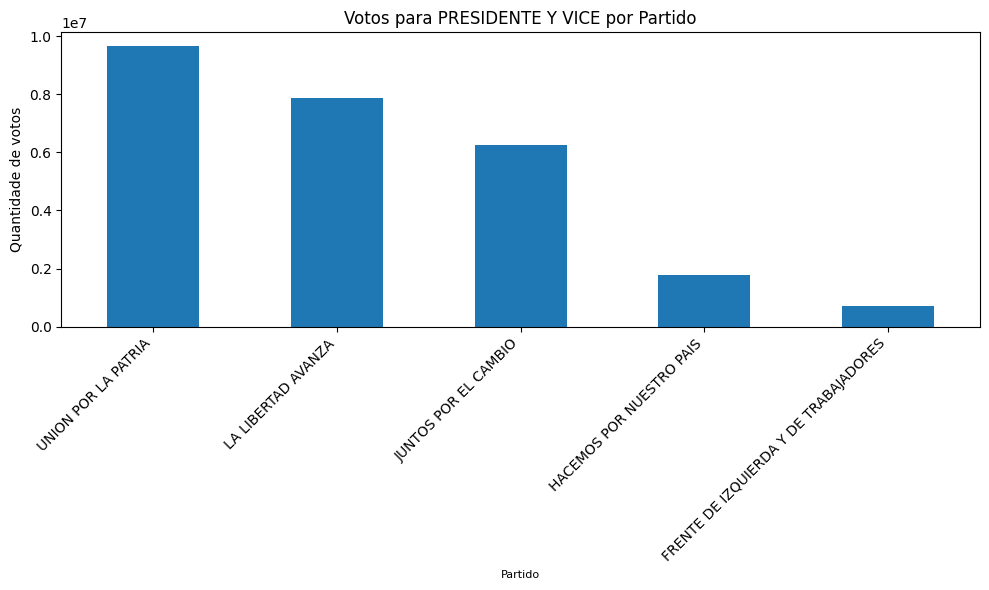

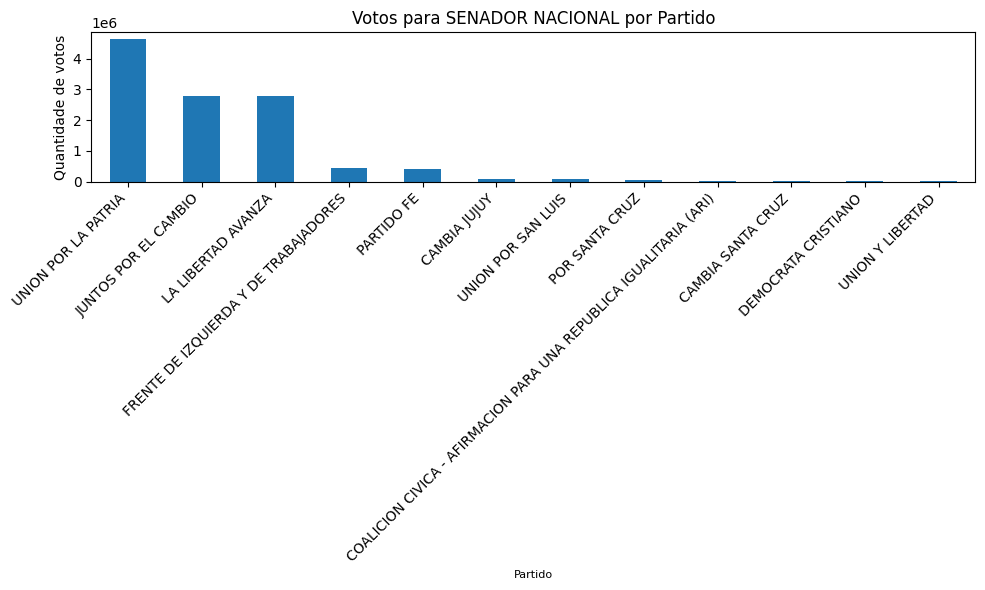

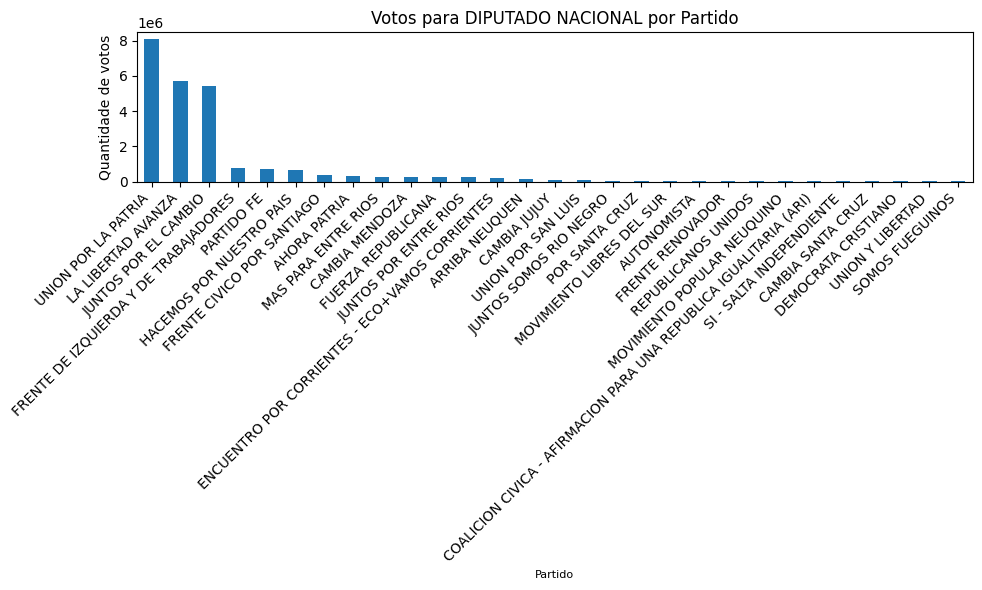

In [44]:
plot_votos(df_2023,"PRESIDENTE Y VICE")
plot_votos(df_2023,"SENADOR NACIONAL")
plot_votos(df_2023,"DIPUTADO NACIONAL")

In [45]:
#Leitura do CSV de 2021 contendo os resultados eleitorais provisorios
df_2021 = read_csv("data\ResultadosElectorales_2021_Generales.csv")
df_2021["agrupacion_nombre"] = df_2021["agrupacion_nombre"].apply(normalize_name)

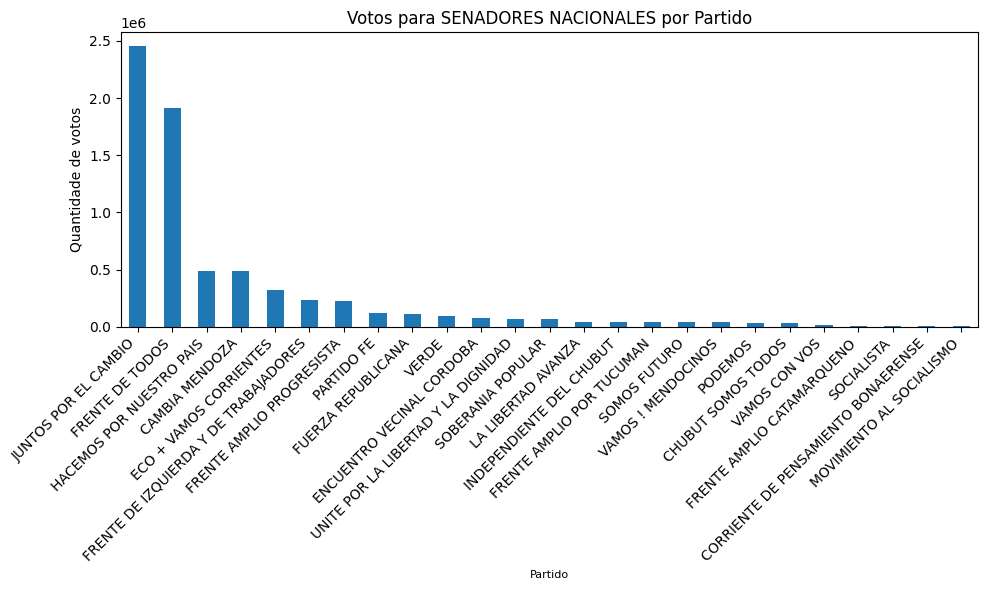

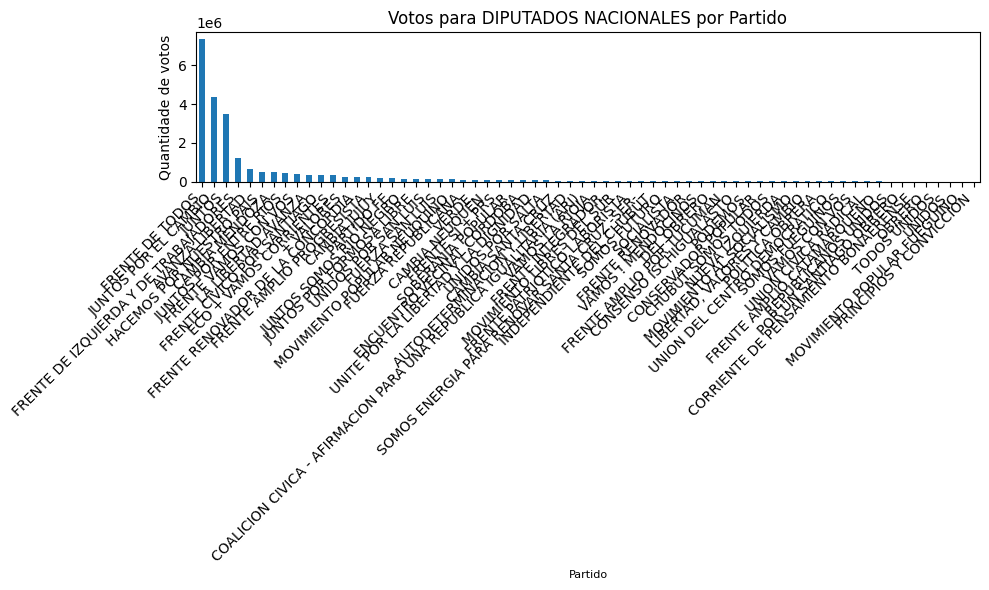

In [46]:
plot_votos(df_2021,"SENADORES NACIONALES")
plot_votos(df_2021,"DIPUTADOS NACIONALES")

In [47]:
#Leitura do CSV de 2019 contendo os resultados eleitorais provisorios
df_2019 = read_csv("data\ResultadosElectorales_2019_Generales.csv")
df_2019['agrupacion_nombre'] = df_2019['agrupacion_nombre'].apply(normalize_name)

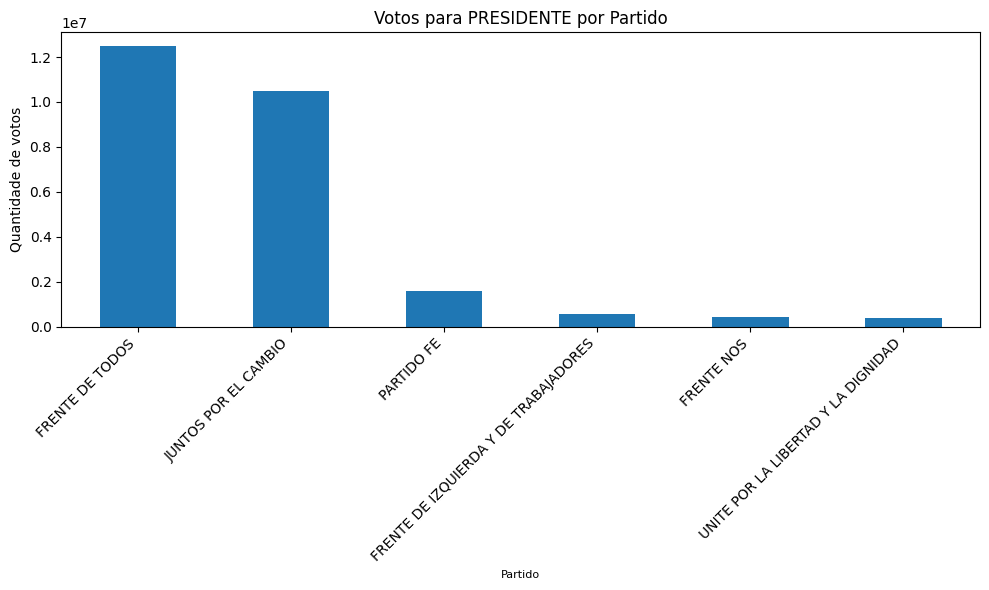

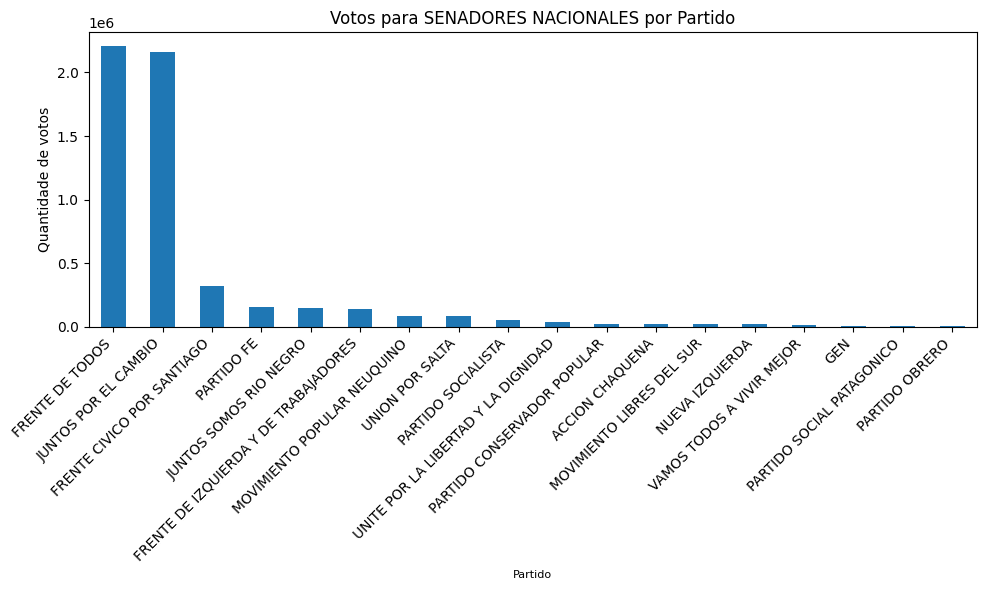

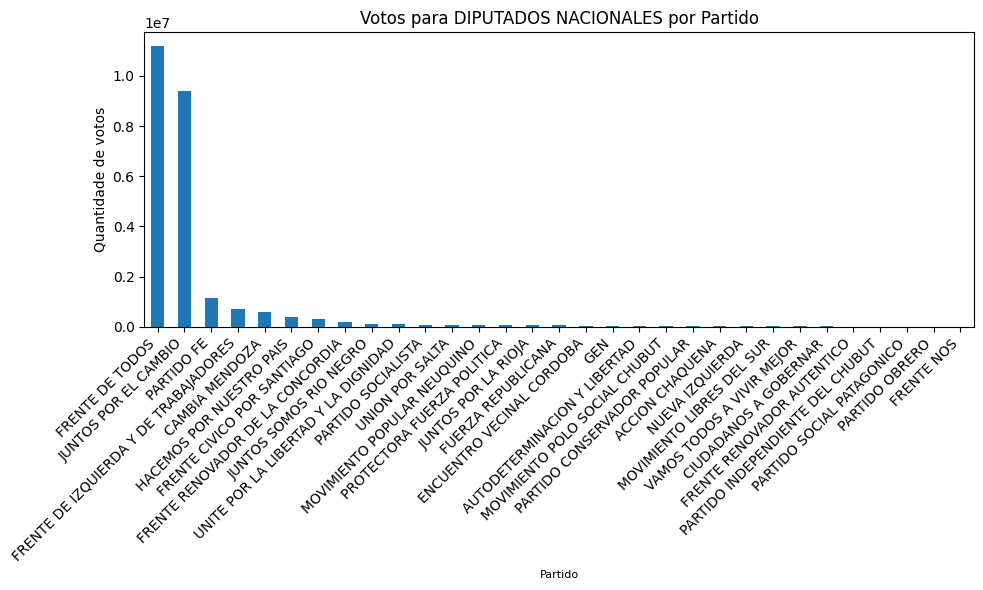

In [48]:
plot_votos(df_2019,"PRESIDENTE")
plot_votos(df_2019,"SENADORES NACIONALES")
plot_votos(df_2019,"DIPUTADOS NACIONALES")

In [49]:
#Leitura do CSV de 2015 contendo os resultados eleitorais provisorios
df_2015 = read_csv("data\ResultadosElectorales2015.csv")
df_2015['agrupacion_nombre'] = df_2015['agrupacion_nombre'].apply(normalize_name)

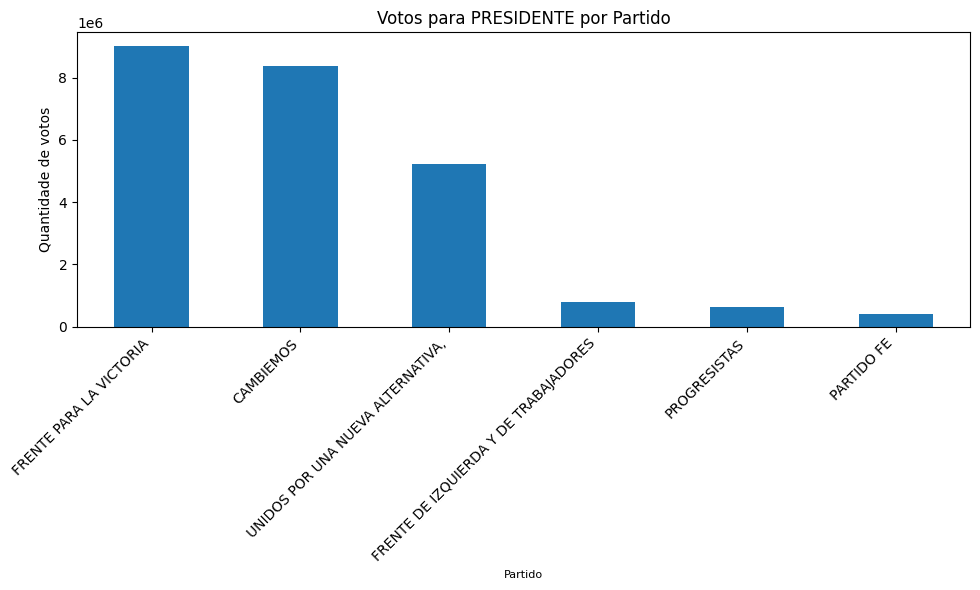

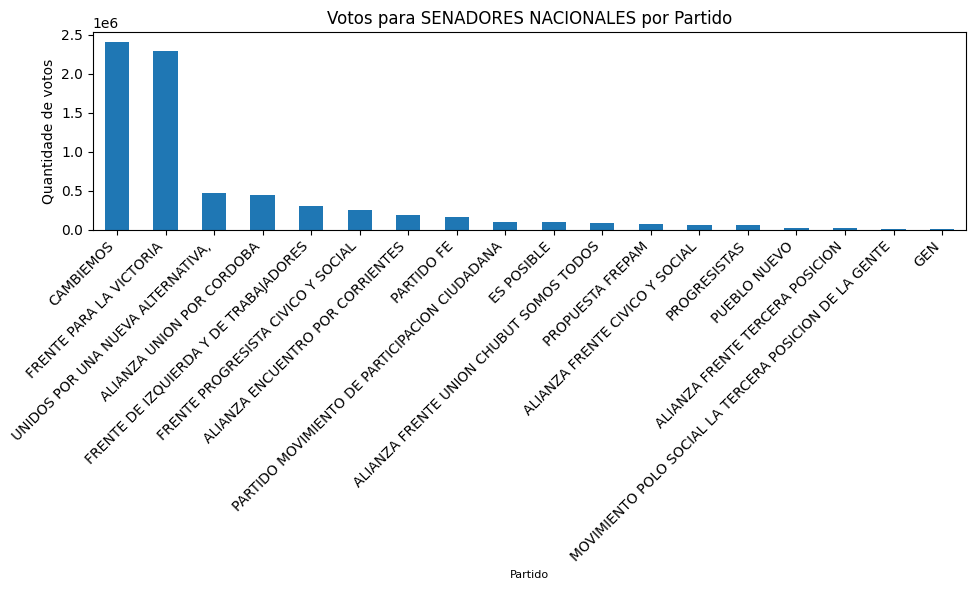

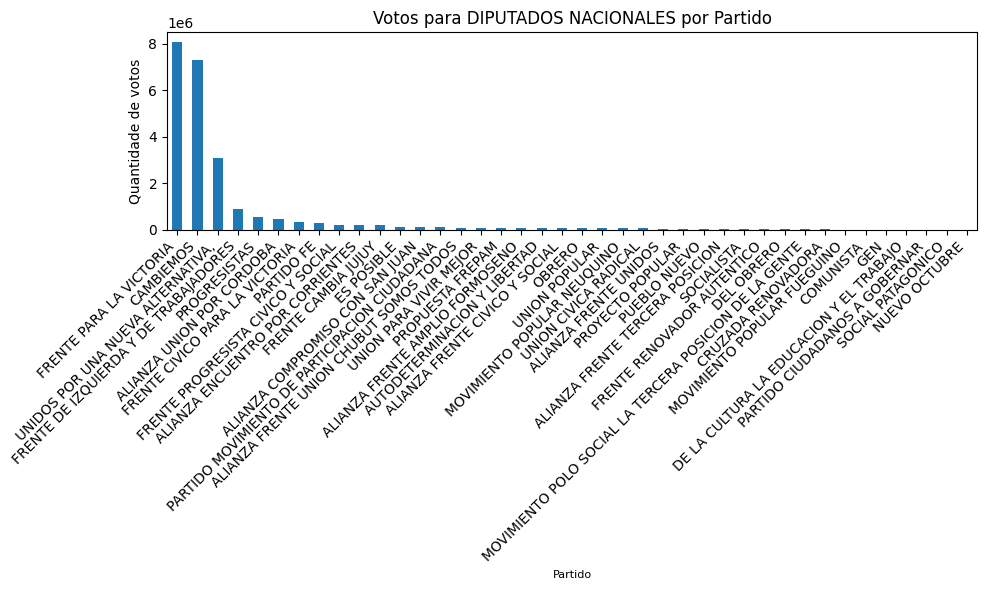

In [50]:
plot_votos(df_2015,"PRESIDENTE")
plot_votos(df_2015,"SENADORES NACIONALES")
plot_votos(df_2015,"DIPUTADOS NACIONALES")

In [51]:
#Leitura do CSV de 2013 contendo os resultados eleitorais provisorios
df_2013 = read_csv("data\ResultadosElectorales2013.csv")
df_2013['agrupacion_nombre'] = df_2013['agrupacion_nombre'].apply(normalize_name)

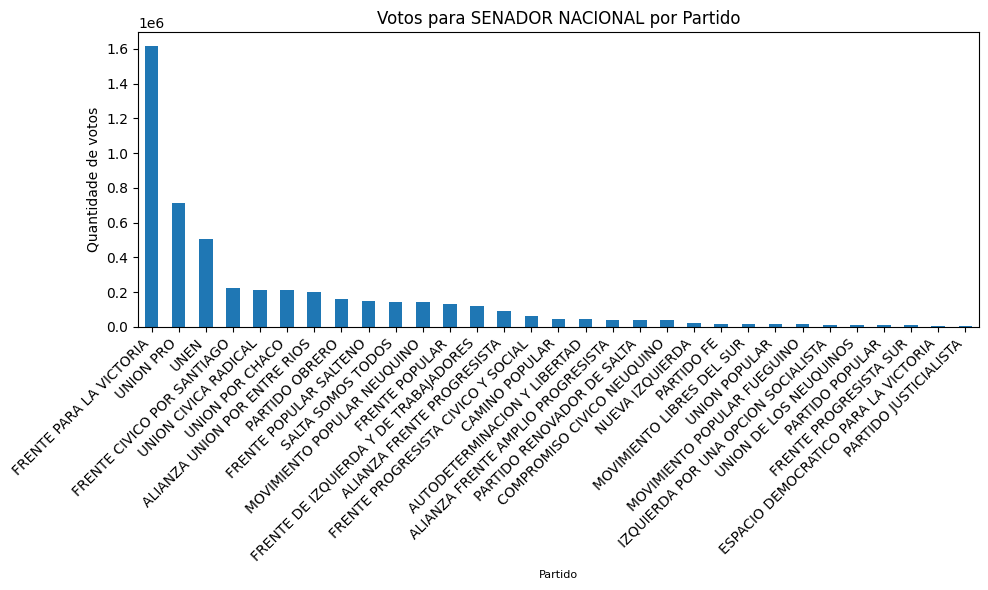

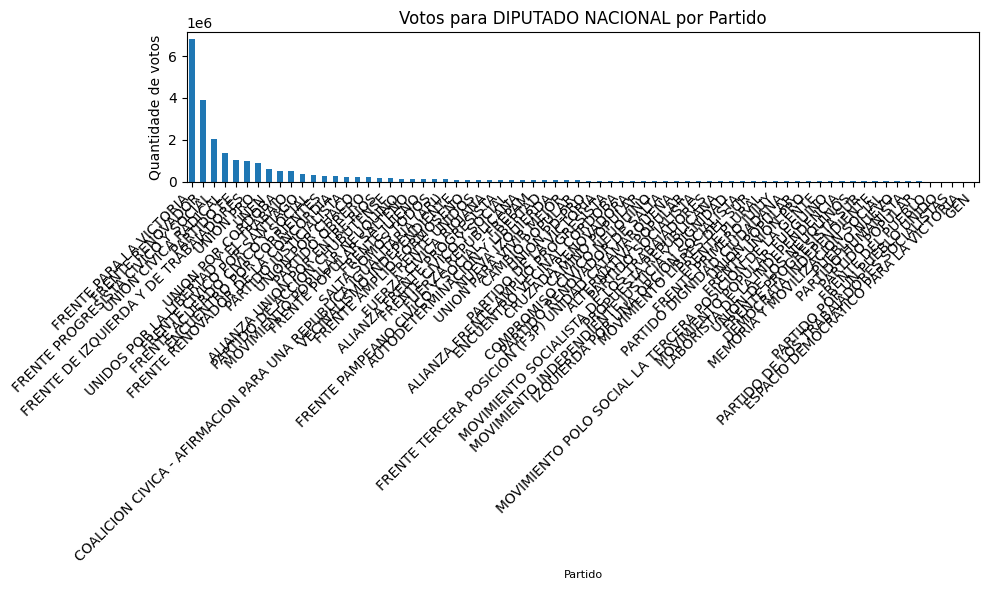

In [52]:
plot_votos(df_2013,"SENADOR NACIONAL")
plot_votos(df_2013,"DIPUTADO NACIONAL")

In [53]:
df_ipp = read_csv("data\PartidosNacionaisArgentinaIPP.csv")
df_ipp['Partidos/Coalizacoes Nacionais'] = df_ipp['Partidos/Coalizacoes Nacionais'].apply(normalize_name)

In [54]:
def calcular_ipp_eleicao(df_votos: pd.DataFrame, df_ipp: pd.DataFrame, filtro_cargo: str ,coluna_partido="agrupacion_nombre"):
    # Filtra apenas a eleicao e o cargo desejado
    df_cargo = df_votos[df_votos["cargo_nombre"] == filtro_cargo].copy()

    # Merge para associar o IPP de cada partido
    df_merge = df_cargo.merge(df_ipp, left_on=coluna_partido, right_on="Partidos/Coalizacoes Nacionais", how='left')

    # Renomeia a col IPP
    df_merge.rename(columns={"IPP (Índice de Posição Política)": "IPP"}, inplace=True)

    # Converte para numérico 
    df_merge["IPP"] = pd.to_numeric(df_merge["IPP"], errors="coerce")
    df_merge["votos_cantidad"] = pd.to_numeric(df_merge["votos_cantidad"], errors="coerce")
    
    # Calcula peso IPP * votos
    df_merge["IPP_ponderado"] = df_merge["IPP"] * df_merge["votos_cantidad"]

    # Soma todos os IPPs ponderados
    ipp_total = df_merge["IPP_ponderado"].sum()

    return ipp_total, df_merge

In [55]:
anos_dfs_cargo = {
    2023: (df_2023, "DIPUTADO NACIONAL"),
    2021: (df_2021, "DIPUTADOS NACIONALES"),
    2019: (df_2019, "DIPUTADOS NACIONALES"),
    2015: (df_2015, "DIPUTADOS NACIONALES"),
    2013: (df_2013, "DIPUTADO NACIONAL"),
}

resultados = {}

for ano, (df, cargo) in anos_dfs_cargo.items():
    ipp_total, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
    resultados[ano] = (ipp_total, df_merge)
    print(f"IPP total da eleição {ano}: {ipp_total}")

IPP total da eleição 2023: 15156135.0
IPP total da eleição 2021: -1222323.0
IPP total da eleição 2019: 9861238.0
IPP total da eleição 2015: 3100562.0
IPP total da eleição 2013: -3038171.0


In [56]:
partidos_ja_classificados = set(df_ipp["Partidos/Coalizacoes Nacionais"].dropna().unique())

for ano, (_, df_merge) in resultados.items():
    partidos_ano = set(df_merge["agrupacion_nombre"].dropna().unique())
    partidos_nao_classificados = partidos_ano - partidos_ja_classificados

    print(f"Partidos de {ano} para deputados nacionais ainda nao classificados:")
    print(partidos_nao_classificados)
    print(len(partidos_nao_classificados))
    print()

Partidos de 2023 para deputados nacionais ainda nao classificados:
{'JUNTOS POR ENTRE RIOS', 'UNION Y LIBERTAD', 'UNION POR SAN LUIS', 'ARRIBA NEUQUEN', 'CAMBIA SANTA CRUZ', 'JUNTOS SOMOS RIO NEGRO', 'AHORA PATRIA', 'REPUBLICANOS UNIDOS', 'FUERZA REPUBLICANA', 'DEMOCRATA CRISTIANO', 'ENCUENTRO POR CORRIENTES - ECO+VAMOS CORRIENTES', 'AUTONOMISTA', 'MOVIMIENTO POPULAR NEUQUINO', 'SOMOS FUEGUINOS', 'MAS PARA ENTRE RIOS', 'CAMBIA JUJUY', 'SI - SALTA INDEPENDIENTE', 'FRENTE CIVICO POR SANTIAGO', 'POR SANTA CRUZ'}
19

Partidos de 2021 para deputados nacionais ainda nao classificados:
{'POR UN SANTIAGO OBRERO', 'FUERZA SAN LUIS', 'INDEPENDIENTE DEL CHUBUT', 'CHUBUT SOMOS TODOS', 'CAMBIA NEUQUEN', 'JUNTOS POR ENTRE RIOS', 'CORRIENTE DE PENSAMIENTO BONAERENSE', 'UNIDOS POR SALTA', 'JUNTOS POR FORMOSA LIBRE', 'FRENTE RENOVADOR DE LA CONCORDIA', 'CAMBIA SANTA CRUZ', 'ECO + VAMOS CORRIENTES', 'UNIDOS', 'JUNTOS SOMOS RIO NEGRO', 'VERDE', 'CONSERVADOR POPULAR', 'VAMOS CON VOS', 'REPUBLICANOS UNIDOS

In [57]:
def calcular_votos_em_coalizoes(df, coalizoes, ano):
    # Cria coluna indicando se o partido pertence à coalizão
    df['eh_coalizao'] = df['agrupacion_nombre'].isin(coalizoes)

    # Calcula os votos
    votos_coalizao = df.loc[df['eh_coalizao'], 'votos_cantidad'].sum()
    votos_outros = df.loc[~df['eh_coalizao'], 'votos_cantidad'].sum()

    # Exibe o resultado
    print(f"Resultados de {ano}:")
    print(f"Votos em coalizões: {votos_coalizao:,}")
    print(f"Votos fora de coalizões: {votos_outros:,}\n")

    return votos_coalizao, votos_outros

for ano, (_, df_merge) in resultados.items():
    calcular_votos_em_coalizoes(df_merge, coalizoes, ano) 

Resultados de 2023:
Votos em coalizões: 28,095,684
Votos fora de coalizões: 5,226,065

Resultados de 2021:
Votos em coalizões: 16,081,829
Votos fora de coalizões: 10,085,127

Resultados de 2019:
Votos em coalizões: 33,869,434
Votos fora de coalizões: 2,967,662

Resultados de 2015:
Votos em coalizões: 20,085,413
Votos fora de coalizões: 7,620,639

Resultados de 2013:
Votos em coalizões: 29,155,295
Votos fora de coalizões: 8,970,089

